<html>
<h1 style="text-align:center;color:red;background-color:powderblue;font-size:400%">Credit Card Fraud Detection</h1>
</html>

<html>
<img src="https://media0.giphy.com/media/jbahvLZdAB17i/giphy.gif" alt="Computer man" style="width:800px;height:300px;"/>
</html>

<html>
    <p style="border:4px solid violet;color:indigo;background-color:tan"><b>About Dataset :</b><br>
 👉The dataset contains transactions made by credit cards in September 2013 by European cardholders.<br>
👉This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br><br>
👉It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>👉 Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise..</p>
</html>

<html>
<h1 style="text-align:left;color:red;font-size:200%">Table of Contents : </h1>
</html>

  * [Data Manipulation](#sec1)
       * [Importing Dataset](#sec1.1)
       * [Dataset View](#sec1.2)
       * [Dataset Information](#sec1.3)
       * [Summary Statistics](#sec1.4)
       * [Checking for unique values in integer type attribute](#sec1.5)
       * [Checking for missing values in each column](#sec1.6)
       * [percentage of missing values in each column](#sec1.7)
       
  * [Data Visualization](#sec2)
       * [Missing Value Plot](#sec2.1)
       * [Density Plot of Continuous Variables](#sec2.2)
       * [Box plot for each continuous variavles](#sec2.3)
       * [Heatmap](#sec2.4)
       * [Density plot of each continuous variable after removing outliers](#sec2.5)
       * [Box plot of each continuous variable after removing outliers](#sec2.6)
       * [Bar Plot of each variable show label distribution of target variable](#sec2.7)
       * [Pie chart of target Variable](#sec2.8)
       * [Count Plot of target variable](#sec2.9)
       
  * [Feature Selection](#sec3)
       * [ANOVA for feature selection](#sec3.1)
       
  * [SMOTE(Synthetic Minority Oversampling Technique)](#sec8)
       
  * [Splitting our dataset into train and test set](#sec4)
  
  * [Feature Scaling](#sec5)
       
  * [Modeling](#sec6)
       * [Decision Tree](#sec6.1)
       * [KNN](#sec6.2)
       * [Naive Bayes](#sec6.3)
       * [Support Vector Classifier](#sec6.4)
       * [Random Forest](#sec6.5)
       * [Xb-Boost](#sec6.6)
       
  * [Model Comparison](#sec7)
       * [Maximum Accuracies in each Column ](#sec7.1)
       * [Minimum Accuracies in each Column ](#sec7.2)

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries 

<html>
<img src="https://newrelic.com/sites/default/files/wp_blog_inline_files/shutterstock_1352528811.jpg" alt="Computer man" style="width:150px;height:100px;"/>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#imported different libraries where we will be working with.

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [3]:
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')

### Dataset View <a class="anchor" id="sec1.2"></a>

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Information <a class="anchor" id="sec1.3"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Here we can see that all the data types are in <b>float</b> type except 'Class' which is in <b>Binary</b> type.</p>
</html>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Summary Statistics <a class="anchor" id="sec1.4"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    *<b>Measures of Frequency</b>              :- Count, Percent, Frequency.<br>
    *<b>Measures of Central Tendency</b>       :- Mean, Median, and Mode.<br>
    *<b>Measures of Dispersion or Variation</b>:- Range(min,max),Variance, Standard Deviation.<br>
    *<b>Measures of Position</b>               :- Percentile Ranks, Quartile Ranks.</p>
</html>

In [6]:
df.describe().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Checking for unique values in all attribute <a class="anchor" id="sec1.5"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Different numbers of distint values in each attribute. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise </p>
</html>

In [7]:
df.nunique().sort_values(ascending=True)

Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64

In [8]:
df.Class.unique()

array([0, 1])

### Checking for missing values in each column <a class="anchor" id="sec1.6"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">No such missing values in our dataset.<br>
If you want to learn how to treat the missing values.Go through this link
<a href="https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/">CLICK HERE</a></p>
</html>

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### percentage of missing values in each column <a class="anchor" id="sec1.7"></a>

In [10]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Time     0.00 %
V1       0.00 %
V2       0.00 %
V3       0.00 %
V4       0.00 %
V5       0.00 %
V6       0.00 %
V7       0.00 %
V8       0.00 %
V9       0.00 %
V10      0.00 %
V11      0.00 %
V12      0.00 %
V13      0.00 %
V14      0.00 %
V15      0.00 %
V16      0.00 %
V17      0.00 %
V18      0.00 %
V19      0.00 %
V20      0.00 %
V21      0.00 %
V22      0.00 %
V23      0.00 %
V24      0.00 %
V25      0.00 %
V26      0.00 %
V27      0.00 %
V28      0.00 %
Amount   0.00 %
Class    0.00 %
dtype: float64


## Data Visualization <a class="anchor" id="sec2"></a>

### Missing Value Plot <a class="anchor" id="sec2.1"></a>

In [11]:
import missingno as msno

<AxesSubplot:>

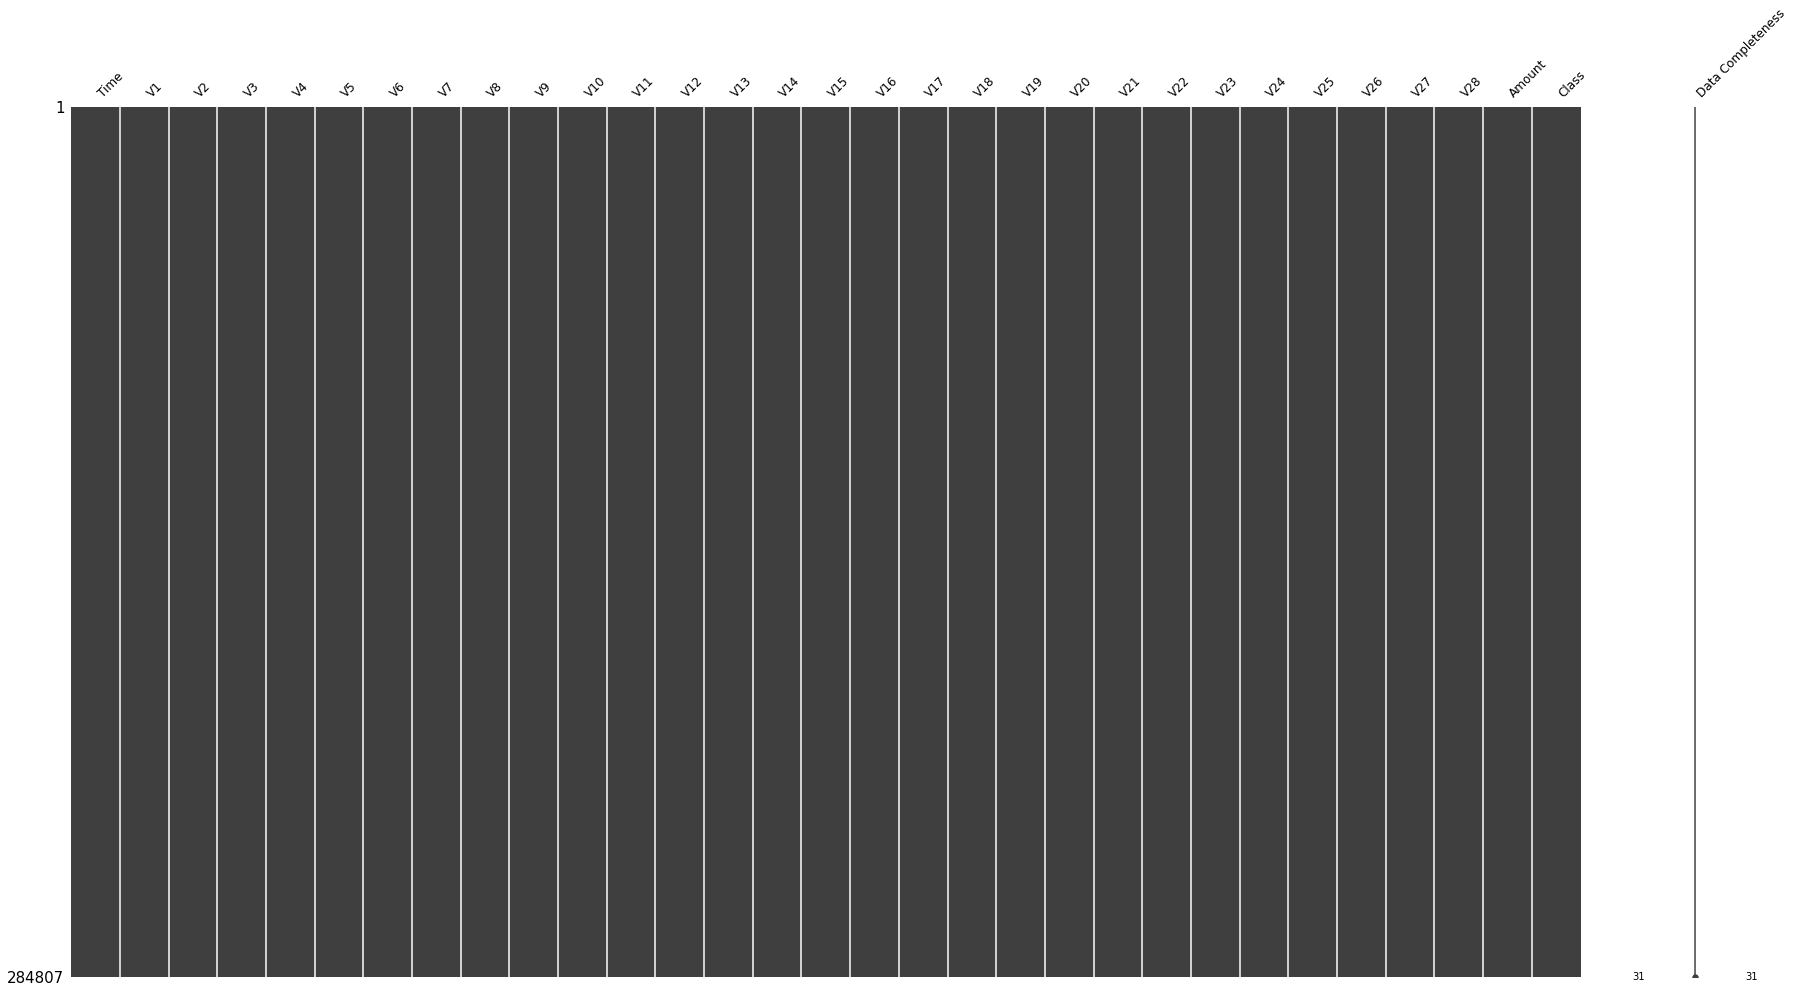

In [12]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Checking the data distribution of each Continuous variable  <a class="anchor" id="sec2.2"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
  <br><b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
</html>

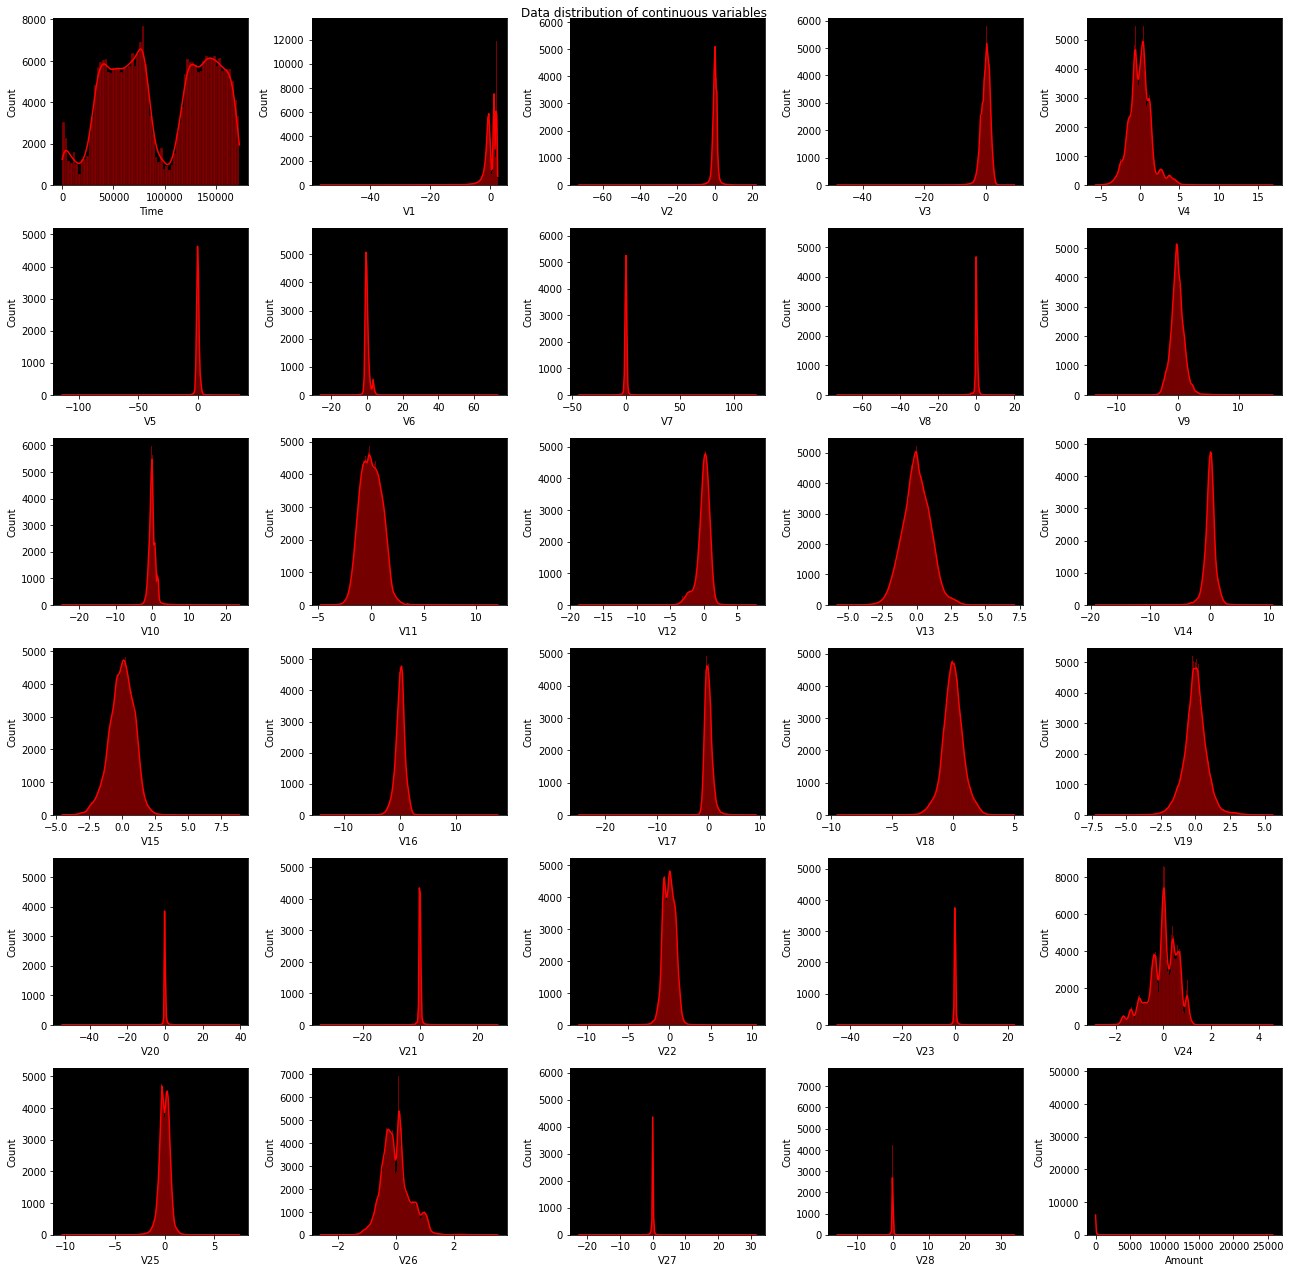

In [13]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

From the above graph we can see that there are a lot of attributes which are positively or negatively distributed.

### Box Plot <a class="anchor" id="sec2.3"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Box Plot-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;text-align:center">
    <b>What is Box Plot?</b><br>
    <img src="https://lh5.googleusercontent.com/Wz6lRE49LVUVq18MyNj6pEwDgdVcHhyDqaG5yGMQX36hy3ZGSyH7fs4A4nbJojGR58k=w2400" alt="Computer man" style="width:800px;height:300px;" /><br>
    In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.</p><br>
    <p style="border:4px solid violet;color:teal;background-color:tan;">
        <b>How to interpret boxplot</b><br>
    *Median: In the box plot, the median is displayed rather than the mean.<br>
    * Q1: The first quartile (25%) position.<br>
  * Q3: The third quartile (75%) position.<br>
  *  Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.<br>
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.<br>
  *  Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

</p>
</html>

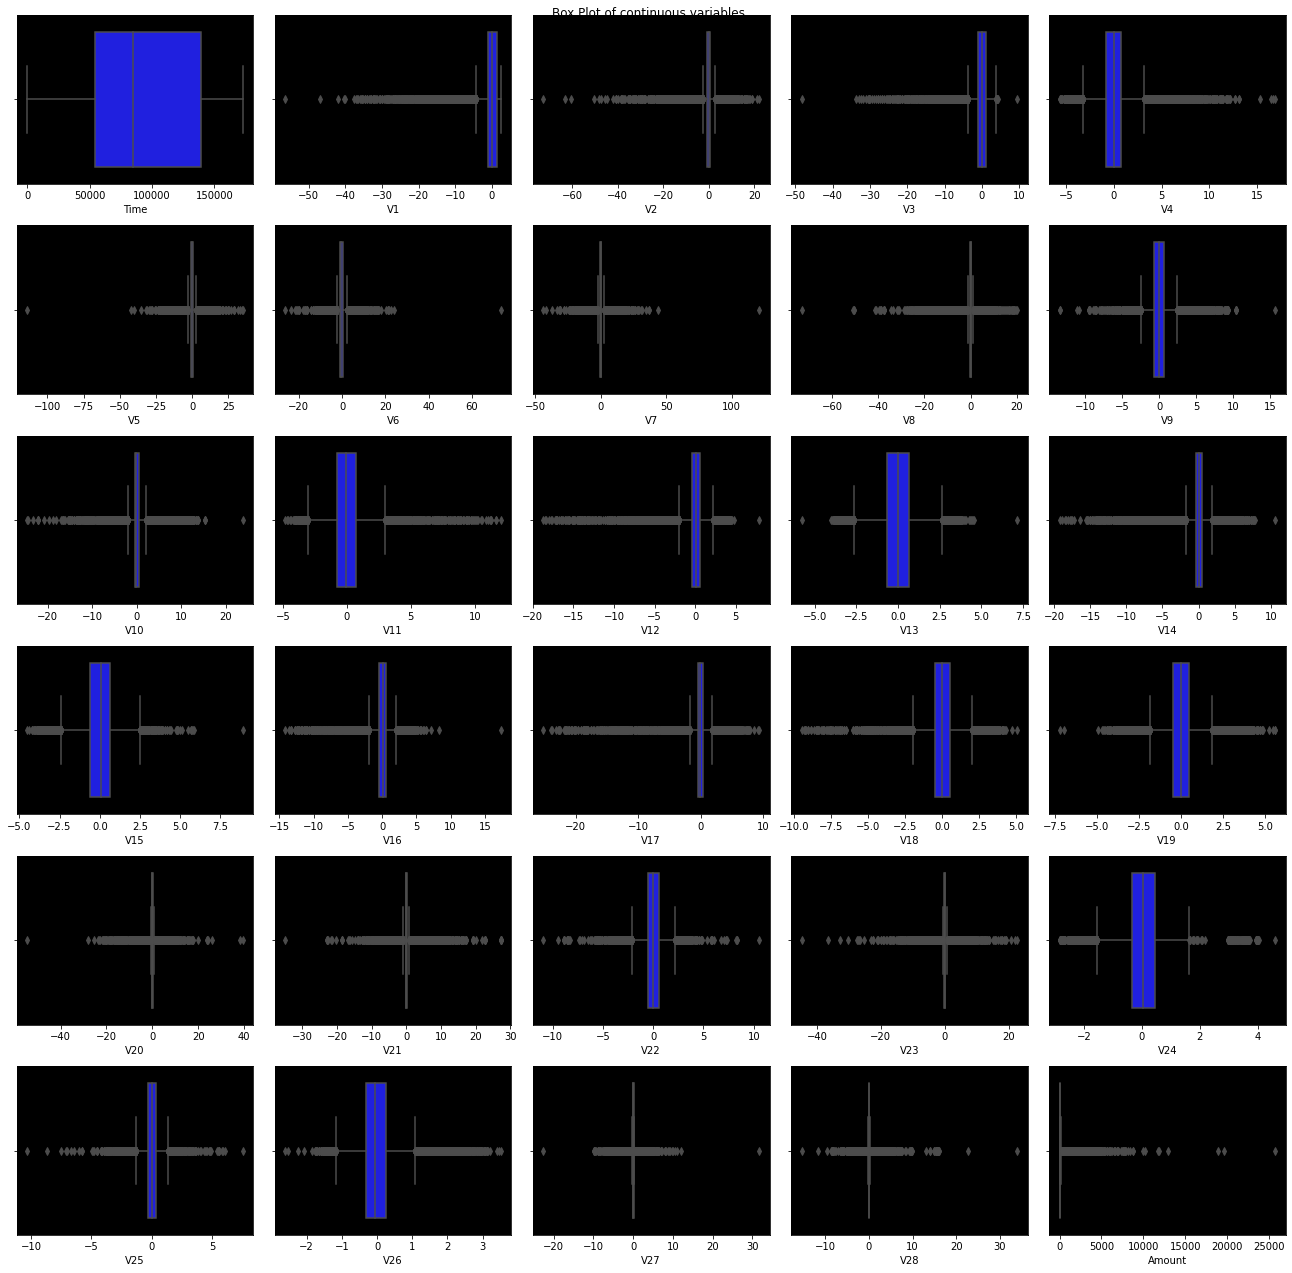

In [14]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [15]:
#This function will replace the outliers with the median from the dataset
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function 
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [16]:
#selecting variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

In [17]:
df=outlier_treating(df,var)

### Data distribution after treating outliers <a class="anchor" id="sec2.4"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Now the Distribution plots look more symmetrical after treating the outliers.</p>
</html>

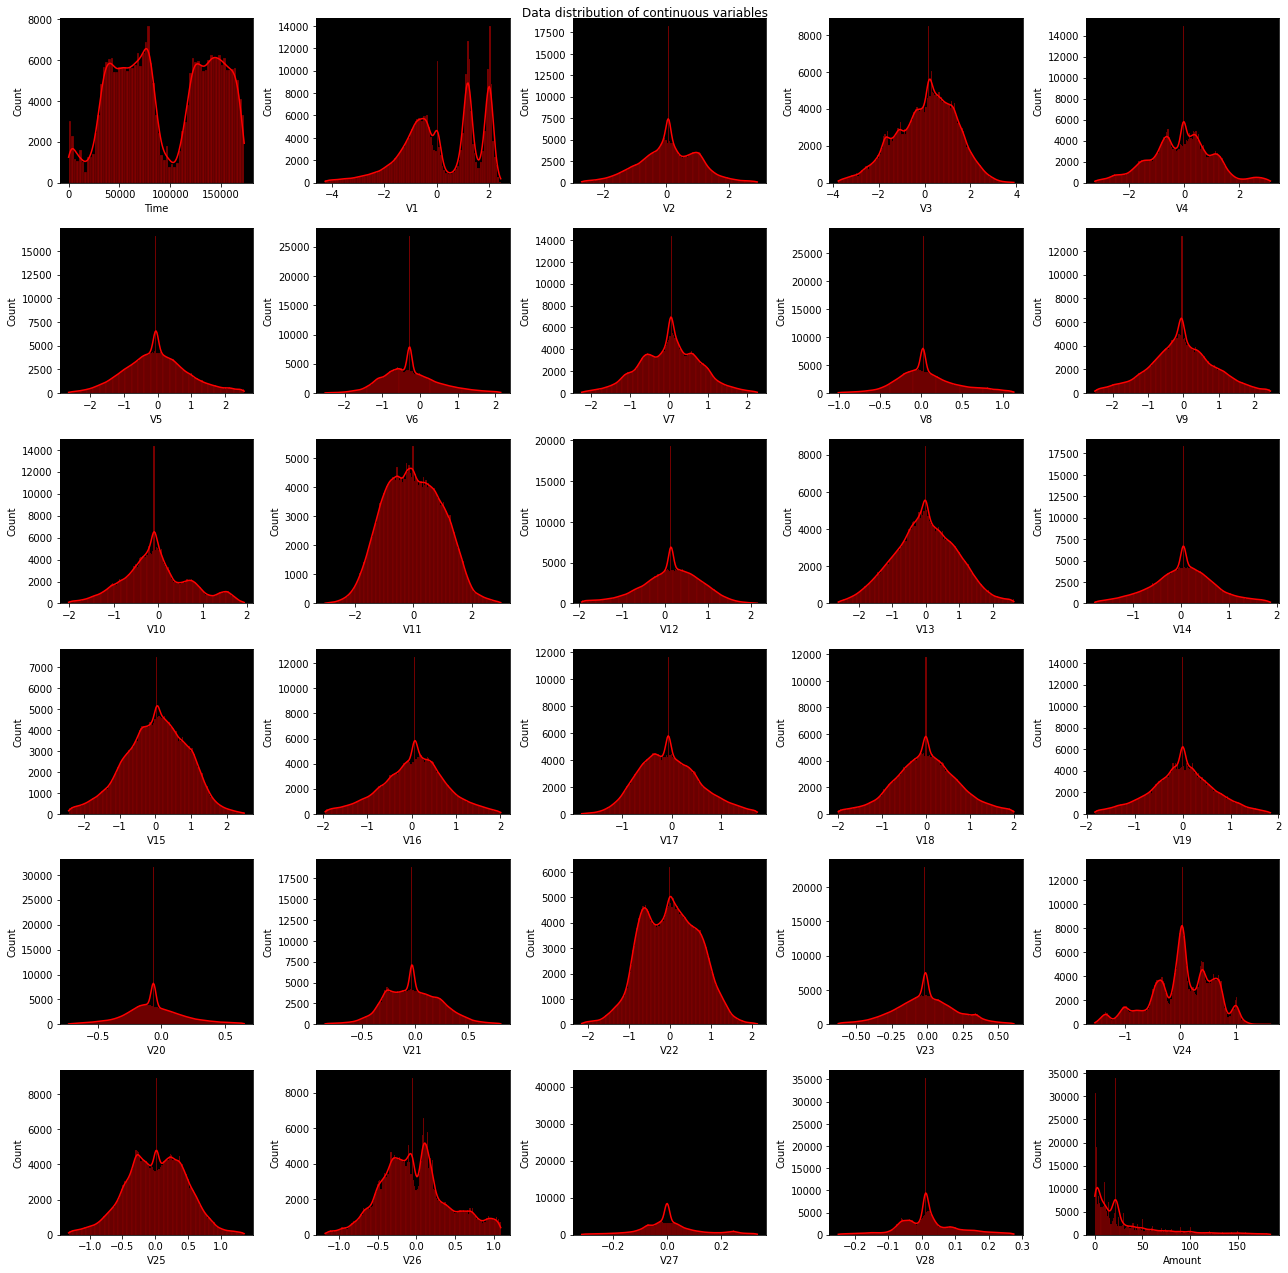

In [18]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box Plot after treating outliers <a class="anchor" id="sec2.5"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Now our Box plots look better after treating the outliers.</p>
</html>

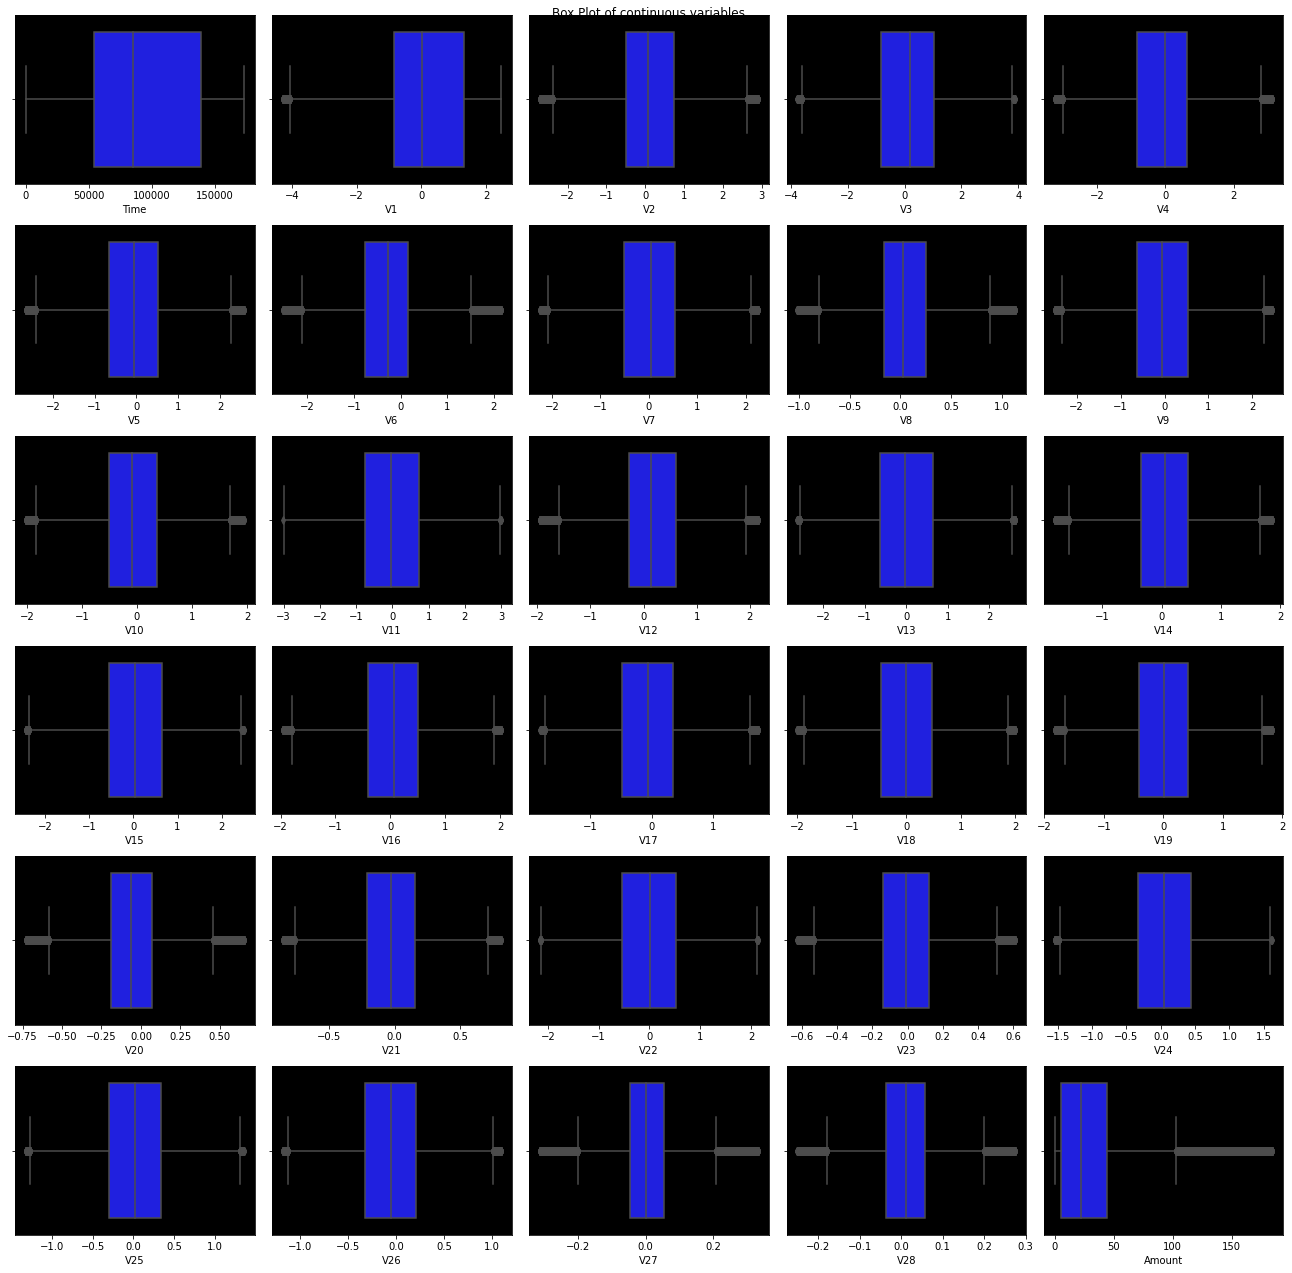

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Heatmap <a class="anchor" id="sec2.6"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Correlation Coefficient-</b></p>
    <img src="https://lh6.googleusercontent.com/WJ-mqD3qf1j4DsE47HifHWf6d3H_2rrjbA0yVPpY-pIGapiZPX2uzM5l055oW-Nvp1U=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    <img src="https://lh5.googleusercontent.com/mJZDT-3QSQol0hs-opFs6NWUYMpFmiB7Hye-SQGaYJLiO-2LO2-a4358ljGymYUA4Yw=w2400" alt="Computer man" style="width:600px;height:200px;"/>
</html>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">With this heatmap plot we can interpret which variable is how much correlated to other variable.</p>
</html>

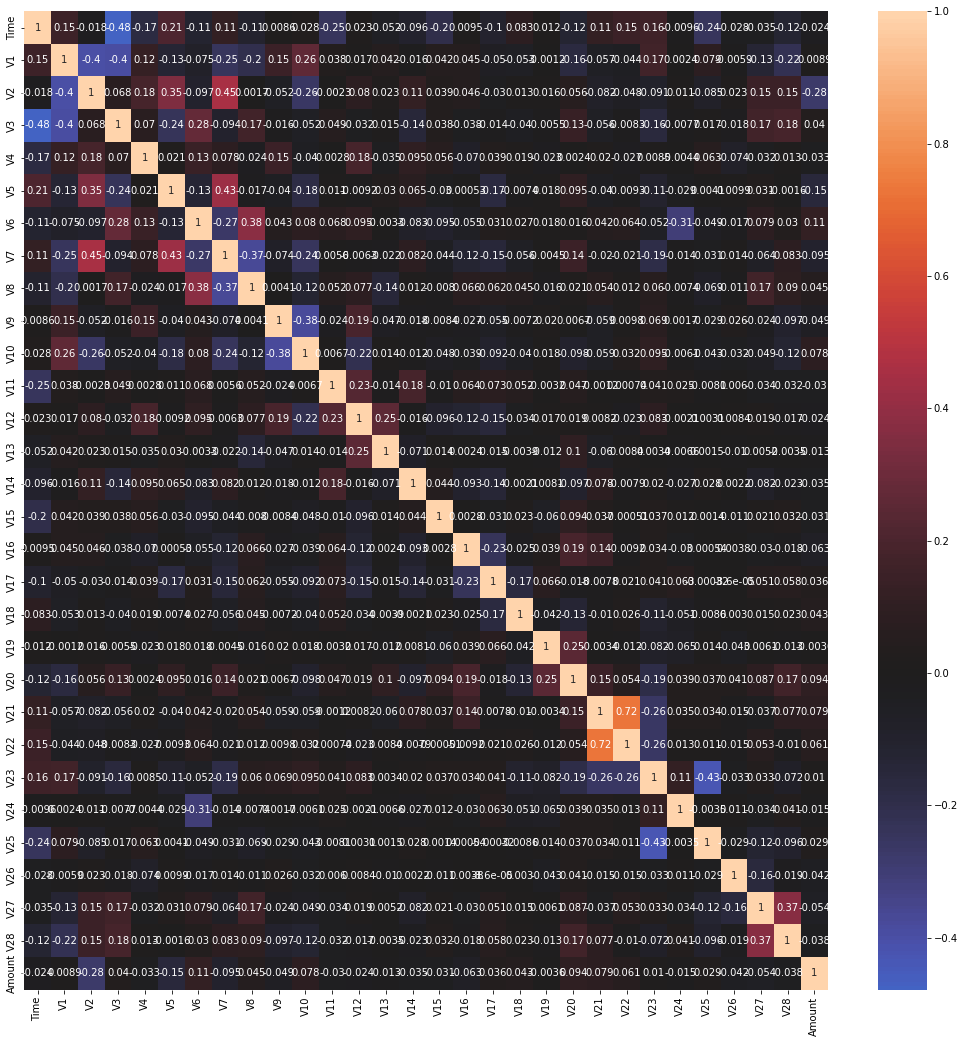

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

### Bar Plot <a class="anchor" id="sec2.7"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Here we can look at each plot and see the contribution of each feature to the Class Variable.</p>
</html>

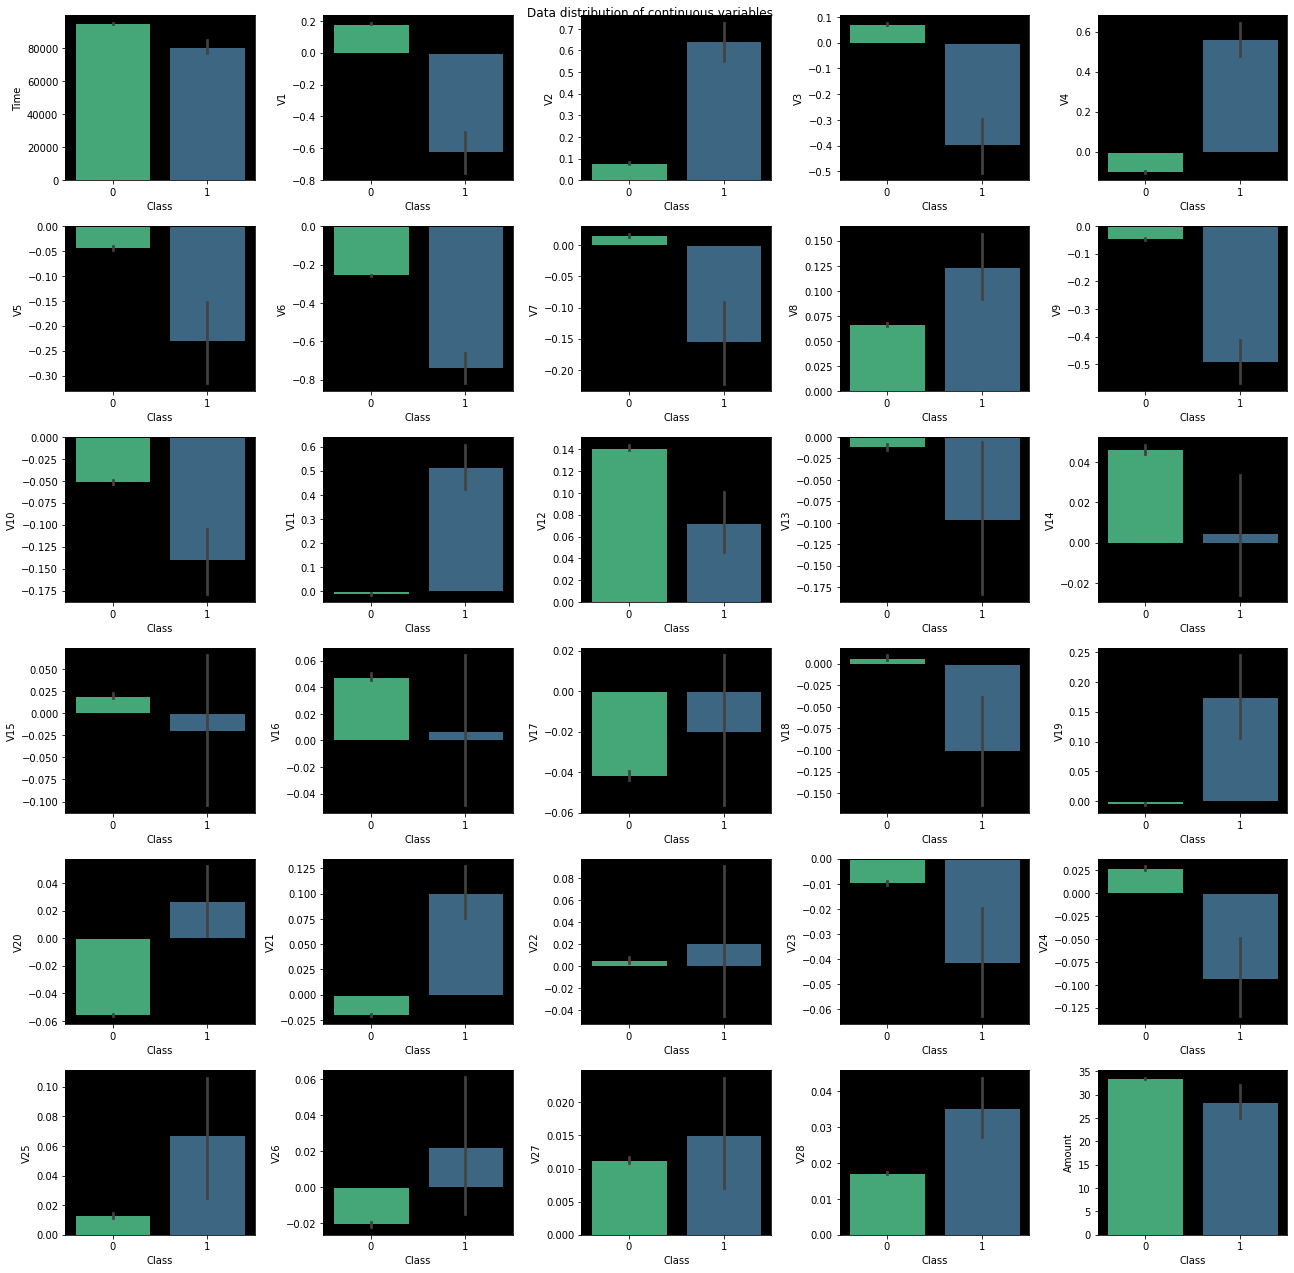

In [21]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.barplot(data=df,x='Class', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Analysing the target Variable <a class="anchor" id="sec2.4"></a>

#### Quality

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Balanced and Imbalanced data-</b></p>
    <img src="https://lh5.googleusercontent.com/KehyaPcGqhC5JHTYIHGbhmYcmwqoqM7bwsqlbwB8j9lkpQm7O3-LDteJn2Z6SqiWX2c=w2400" alt="Computer man" style="width:800px;height:300px;"/>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Balanced data?</b><br>
    Balanced data refers to those types of datasets where the target class has an even distribution of observations, i.e all class label have equal number of observations in the dataset.</p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Unbalanced data?</b><br>
    Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.</p>
    </html>

### Pie Chart shows that the target class is Unbalanced.<a class="anchor" id="sec2.8"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Pie chart tells that this is a case of <b>Unbalanced data</b> so I will SMOTE technique to oversample the data.</p>
</html>

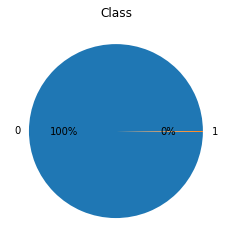

In [22]:
target_var=pd.crosstab(index=df['Class'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Class')
plt.show()

### Count plot shows that the target class is imbalanced <a class="anchor" id="sec2.9"></a>

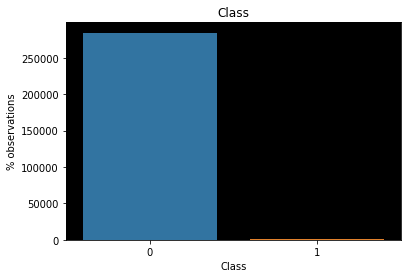

In [23]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('Class')
plt.show()

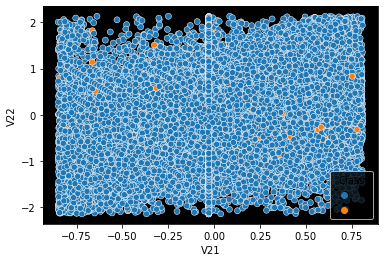

In [24]:
sns.scatterplot(x=df.V21,y=df.V22,hue=df.Class)
plt.show()

In [26]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

### Feature Selection <a class="anchor" id="sec3"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Selection-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..</p>
<img src="https://lh6.googleusercontent.com/exNj6JGWZNAzyB8XXd1LM5FrgMGbfyV09Qgts5bPJA14O7-8AqATF9suuWqYo6oYhOk=w2400" alt="Computer man" style="width:800px;height:300px;"/>
 </html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    In our dataset we have numerical Input variable and Categorical Output variable.so we will use <b>ANOVA</b> for the feature selection.<br><br>
    <b>ANOVA</b>:The ANOVA test allows a comparison of more than two groups at the same time to determine whether a relationship exists between them. The result of the ANOVA formula, the F statistic (also called the F-ratio), allows for the analysis of multiple groups of data to determine the variability between samples and within samples.</p>
 </html>

In [27]:
from sklearn.feature_selection import f_classif#ANOVA

In [28]:
fs =f_classif(X,y)

In [29]:
selected_var=[]
print('if p-value<0.05 : Reject the null hypothesis \nif p-value>0.05 :Fail to relect the null hypothesis.\n')
for i,j in enumerate(X.columns):
    print(f'Null hypothesis: There is no significant difference between the mean {j} among different groups of Class.')
    print(f'Alternate Hypothesis: There is a significant difference between the mean {j} among different groups of Class.')
    if fs[1][i]<0.05:#p-values<0.05
        print(f'{j} : Reject the null hypothesis.\n')
    else:
        print(f'{j} : Fail to reject the null hypothesis.\n')
        selected_var.append(j)

if p-value<0.05 : Reject the null hypothesis 
if p-value>0.05 :Fail to relect the null hypothesis.

Null hypothesis: There is no significant difference between the mean Time among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean Time among different groups of Class.
Time : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V1 among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean V1 among different groups of Class.
V1 : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V2 among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean V2 among different groups of Class.
V2 : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V3 among different groups of Class.
Alternate Hypothesis: There is a significant 

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Those features have been selected in which there is no significant difference between the mean among different groups of Class Variable.</p>
    </html>

In [31]:
X=X[selected_var]

### SMOTE(Synthetic Minority Oversampling Technique)<a class="anchor" id="sec8"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Under Sampling and Over Sampling-</b></p>
    <img src="https://lh6.googleusercontent.com/n33kWCxulUum6gl_SSImC7TGtBUs71b-BjOrzv1DPw0PJ8K7QPuo55B4DntBhuLL_RU=w2400" alt="Computer man" style="width:800px;height:300px;"/>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is SMOTE ?</b><br>
    Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.</p>
    </html>

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [34]:
X,y=sm.fit_resample(X,y)

### Count plot after applying SMOTE 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


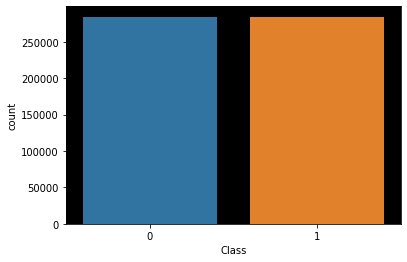

In [35]:
sns.countplot(y)
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


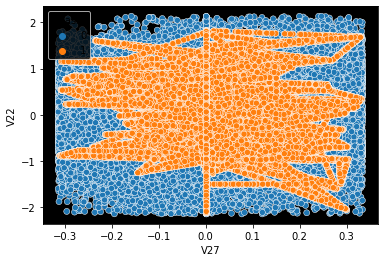

In [36]:
sns.scatterplot(x=X.V27,y=X.V22,hue=y)
plt.show()

### Splitting our dataset into train and test set <a class="anchor" id="sec4"></a>

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

### Feature Scaling <a class="anchor" id="sec5"></a>

<html>
<p style="color:chocolate;font-size:150%;text-align:center">
    <b>Feature Scaling-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;text-align:center">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    <img src="https://lh3.googleusercontent.com/q9a09LIGXoRO_1bdgFw0C3WcjyEhpDnJ3C8COL65yn0gWhRTtFm5US-Q33aAQujuETQ=w2400" alt="Computer man" style="width:800px;height:200px;"/>
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
        <img src="https://lh6.googleusercontent.com/_y4dtry_8ImYjqLTXcH68ZpB1--Iea2n2m08d-GLpbTQ4VSREwy3v1PcX8dGQwLE9PE=w2400" alt="Computer man" style="width:800px;height:200px;"/></p>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Here we are going to use <b>Standardization</b>.</p>
    </html>

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling <a class="anchor" id="sec6"></a>

### Performance Measures for Multi-Class

<html>
<p style="border:4px solid violet;color:green;background-color:tan;text-align:center">
    <b>Confusion Matrix-</b><br>
    <img src="https://lh6.googleusercontent.com/WJEnoqTTOGL2LQynBs3nG4uA47_UB5imRkgfTKVwYaTq8Zmmi-_Ns7SEPI90VVjt5-I=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    <br>
    <b>Other Multiclass Classification Metrics:</b><br>
    <img src="https://lh6.googleusercontent.com/rLIeVDOU5r4vAL1wPwWM0NtxKMUTzgkgOVZkkGiXxMC1VtCimZSrwLTYeEOap5Js8MY=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    </p>
    </html>

### K-fold Cross Validation

<html>
<p style="color:chocolate;font-size:150%;">
    <b>K-fold Cross validation-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;text-align:center">
    <b>What is Cross Validation?</b><br>
    Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>
    <img src="https://lh6.googleusercontent.com/sp2oloxXrxErMlLFkU3p0TqWYUh4O-9OjhQxBk8RcbKyYrxfPSSfGqw4KU61Vw_Qq7A=w2400" alt="Computer man" style="width:800px;height:400px;"/>
    </html>

In [41]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [43]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Decision Tree <a class="anchor" id="sec6.1"></a>

In [44]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 99.69%
Model F1-Score : 99.69%
Cross Val Accuracy: 99.64 %
Cross Val Standard Deviation: 0.01 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56733
           1       1.00      1.00      1.00     56993

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### KNN <a class="anchor" id="sec6.2"></a>

In [45]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 99.69%
Model F1-Score : 99.69%
Cross Val Accuracy: 99.64 %
Cross Val Standard Deviation: 0.01 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56733
           1       1.00      1.00      1.00     56993

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Naive Bayes <a class="anchor" id="sec6.3"></a>

In [46]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 72.49%
Model F1-Score : 72.70%
Cross Val Accuracy: 72.70 %
Cross Val Standard Deviation: 0.03 %
              precision    recall  f1-score   support

           0       0.64      0.77      0.70     46792
           1       0.81      0.69      0.75     66934

    accuracy                           0.72    113726
   macro avg       0.72      0.73      0.72    113726
weighted avg       0.74      0.72      0.73    113726



### Random Forest <a class="anchor" id="sec6.5"></a>

In [47]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 99.90%
Model F1-Score : 99.90%
Cross Val Accuracy: 99.88 %
Cross Val Standard Deviation: 0.01 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56797
           1       1.00      1.00      1.00     56929

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Xg Boost <a class="anchor" id="sec6.6"></a>

In [48]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 99.38%
Model F1-Score : 99.38%
Cross Val Accuracy: 99.41 %
Cross Val Standard Deviation: 0.02 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56399
           1       1.00      0.99      0.99     57327

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



### Model Comparison <a class="anchor" id="sec7"></a>

In [49]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,99.90%,99.90%,99.88%,0.01%
Decision Tree,99.69%,99.69%,99.64%,0.01%
KNN,99.69%,99.69%,99.64%,0.01%
Xg Boost,99.38%,99.38%,99.41%,0.02%
Naive Bayes,72.49%,72.70%,72.70%,0.03%


#### Maximum Accuracies in each Column <a class="anchor" id="sec7.1"></a>

In [50]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,99.90%,99.90%,99.88%,0.01%
Decision Tree,99.69%,99.69%,99.64%,0.01%
KNN,99.69%,99.69%,99.64%,0.01%
Xg Boost,99.38%,99.38%,99.41%,0.02%
Naive Bayes,72.49%,72.70%,72.70%,0.03%


#### Minimum Accuracies in each Column <a class="anchor" id="sec7.2"></a>

In [51]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,99.90%,99.90%,99.88%,0.01%
Decision Tree,99.69%,99.69%,99.64%,0.01%
KNN,99.69%,99.69%,99.64%,0.01%
Xg Boost,99.38%,99.38%,99.41%,0.02%
Naive Bayes,72.49%,72.70%,72.70%,0.03%
